In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
classificationDF = pd.read_csv('Classification.csv')

In [3]:
classificationDF.head() #Displaying first few rows of the DataFrame

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,NaN,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,NaN,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No


In [4]:
classificationDF.describe() #Display summarized statistics of the DataFrame

,Study Hours per Week,Attendance Rate,Previous Grades
count,2831.000000,2836.000000,2833.000000
mean,10.161674,75.474013,65.507236
std,4.970125,20.500440,16.818936
min,-6.200000,11.000000,13.600000
25%,6.800000,61.300000,55.200000
50%,10.200000,75.250000,64.900000
75%,13.400000,89.325000,75.000000
max,29.600000,150.000000,200.000000


In [5]:
classificationDF.info #Proived a conscise summary of the DataFrame

<bound method DataFrame.info of      Student ID  Study Hours per Week  Attendance Rate  Previous Grades  \
0        S00001                  12.5              NaN             75.0   
1        S00002                   9.3             95.3             60.6   
2        S00003                  13.2              NaN             64.0   
3        S00004                  17.6             76.8             62.4   
4        S00005                   8.8             89.3             72.7   
...         ...                   ...              ...              ...   
2995     S02996                  10.4             44.1             43.4   
2996     S02997                  11.3              NaN             61.5   
2997     S02998                   3.8             77.7             55.2   
2998     S02999                  11.7             68.1              NaN   
2999     S03000                   9.2             66.9             65.5   

     Participation in Extracurricular Activities Parent Education L

In [6]:
classificationDF = classificationDF.drop(columns='Student ID') #Dropping unnecessary columns.

### For looping columns to get all unique values

In [8]:
for column in classificationDF.columns:
    print(f"Unique values in '{column}' column:")
    print(classificationDF[column].unique())
    print("\n")

Unique values in 'Study Hours per Week' column:
[12.5  9.3 13.2 17.6  8.8 17.9 13.8  nan 12.7  7.7 11.2  0.4  1.4  7.2
  4.9 11.6  2.9 17.3  8.9 10.3  7.3 10.6  4.2 11.9  7.   8.5 19.3  9.9
  4.7 14.1  3.9 11.   0.2  3.4 10.9  9.4  2.6  6.4 15.3  1.2  8.1  6.6
 13.1 15.2 14.7  5.8 11.7 14.9  7.6  9.1  4.5  4.  16.8  9.6 15.  11.8
  6.8 17.7  9.8 17.8 -3.1 10.4 10.5  0.1 17.4  7.4  6.   7.5 14.6 12.6
 14.8  6.5  8.4  8.   2.7 11.5 11.3  7.9  9.2 12.  19.4 22.3  9.  15.7
 14.   5.5 17.   3.  12.9 21.   2.2 12.4  5.4  6.1  3.8 11.1 16.5  2.
 13.9  5.1 15.8  5.9 12.1 19.5  6.2  5.6 11.4 10.1  8.7  5.7  4.6 13.6
  2.4  7.8 14.3 10.8 12.8 15.4  3.1  5.3 29.3 13.3 21.6  0.7 13.4  1.9
 10.2  6.7 20.7 -0.1  8.3 18.8  3.7 20.6 16.3 12.2  9.7 -6.2 18.2  2.8
 10.7 17.2 12.3  6.9  7.1 14.2 14.5 13.7 16.4 15.5 13.  20.5  5.   8.6
  9.5 13.5 -1.  20.8 14.4 20.9 -0.6 19.2 15.9 16.2  4.4  2.3  6.3 20.3
  5.2  4.1 -0.2 17.5 18.1  1.5 -0.3  3.5  4.8 19.8 -1.5 25.4 15.6 18.4
 10.   1.7  1.  -2.4 20.4 16. 

### Feature Discretization for categorical values is done earlier in order to split datasets for train-test score

Label Encoding for 'Passed' Column(Target Variable):

Yes, Y : 1

No, N  : 0

nan    : -1 (Since RandomForestClassifier doenst accept null/nan values for accuracy scoring)

In [11]:
classificationDF['Passed'] = classificationDF['Passed'].map({"Yes": 1, "Y": 1, "No": 0, "N": 0})
classificationDF['Passed'] = classificationDF['Passed'].fillna(-1)

Label Encoding for 'Participation in Extracurricular Activities' Column:

Yes, Y : 1

No, N  : 0

nan    : -1 

In [13]:
classificationDF['Participation in Extracurricular Activities'] = classificationDF['Participation in Extracurricular Activities'].map({'Yes': 1, 'Y': 1, 'No': 0, 'N': 0, 'nan':np.nan})

Label Encoding for 'Parent Education Level' Column:

High School : 1

Associate   : 2

Bachelor    : 3

Master      : 4

Doctorate   : 

nan    : null

In [15]:
classificationDF['Parent Education Level'] = classificationDF['Parent Education Level'].map({'High School' : 1, 'Associate': 2, 'Bachelor': 3, 'Master': 4, 'Doctorate': 5, 'nan':np.nan})

# <font color='blue'>Part-1</font>

### Describe your dataset. What analysis will be performed?

<p> 
    The dataset is called "student_performance_prediction.csv" and contains over 3000 rows and 7 columns. For demonstration purposes, we are using a subset of 3001 rows, including the headers.

    1. Student ID: A unique identifier for each student (string).
    2. Study Hours per Week: Average number of hours spent studying per week (float, approximate range: ~0.4–25.9).
    3. Attendance Rate: Attendance percentage in the academic year (float, range: ~38.4–115.5).
    4. Previous Grades: Grades obtained in previous assessments (float, range: ~37.8–93.6).
    5. Participation in Extracurricular Activities: Indicates whether a student participates in extracurricular activities  (categorical: Yes/No).
    6. Parent Education Level: The highest education level attained by a parent (categorical: High School, Associate, Bachelor, Master, Doctorate).
    7. Passed: Indicates whether the student passed the course (categorical: Yes/No).

For our analysis, we will use random forest classification and KNN for our chosen dataset. 
</p>

In [17]:
#Distributing independent variables to X and dependent variable to y
X = classificationDF.drop(columns=['Passed'])
y = classificationDF['Passed']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) #Train-Test Split

In [19]:
RFC = RandomForestClassifier(random_state=42) 

In [20]:
RFC.fit(X_train, y_train) #Model fitting

RandomForestClassifier(random_state=42)

In [21]:
#Displaying Train and Test score with noisy data
train_score_RFC = RFC.score(X_train, y_train)
test_score_RFC = RFC.score(X_test, y_test)

In [22]:
print(f"Training Score: {train_score_RFC:.2f}")
print(f"Testing Score: {test_score_RFC:.2f}")

Training Score: 1.00
Testing Score: 0.49


Function for checking duplicates

In [24]:
def check_duplicates(DF):
    duplicate_rows = DF[DF.duplicated()]
    
    if duplicate_rows.empty:
        print("No duplicate rows found.")
    else:
        print(f"Found {len(duplicate_rows)} duplicate rows:")
        print(duplicate_rows)
    
    return duplicate_rows

In [25]:
check_duplicates(classificationDF)

No duplicate rows found.


,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed


In [26]:
#Checking for any null values
null_count = classificationDF.isnull().sum()
null_count

Study Hours per Week                           169
Attendance Rate                                164
Previous Grades                                167
Participation in Extracurricular Activities    149
Parent Education Level                         152
Passed                                           0
dtype: int64

Counting null (-1) values for 'Passed' Column

In [28]:
#Since -1 is passed in null values for train-test scoring we count all -1 values and consider them as null values 
count_negative_one = (classificationDF['Passed'] == -1).sum()
count_negative_one

156

In [29]:
#Displaying all noisy data
null_values = classificationDF.isnull().any(axis=1)
passed_null = classificationDF['Passed'] == -1
noisy_data = classificationDF[null_values | passed_null]
noisy_data

,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,12.5,NaN,75.0,1.0,4.0,1.0
2,13.2,NaN,64.0,0.0,2.0,0.0
8,NaN,100.1,91.9,0.0,3.0,1.0
9,12.7,38.4,37.8,1.0,1.0,-1.0
12,11.2,79.6,49.6,1.0,3.0,-1.0
...,...,...,...,...,...,...
2988,4.3,89.9,79.5,NaN,5.0,0.0
2990,17.6,37.5,84.2,1.0,NaN,1.0
2996,11.3,NaN,61.5,0.0,3.0,1.0
2997,3.8,77.7,55.2,1.0,5.0,-1.0


There are multiple types of noise such as having a categorical data and null values

In [31]:
classificationDF['Participation in Extracurricular Activities'] = classificationDF['Participation in Extracurricular Activities'].fillna(classificationDF['Participation in Extracurricular Activities'].mode()[0])

In [32]:
classificationDF['Parent Education Level'] = classificationDF['Parent Education Level'].fillna(classificationDF['Parent Education Level'].mode()[0])

In [33]:
classificationDF['Passed'] = classificationDF['Passed'].replace(-1, np.nan)
classificationDF['Passed'] = classificationDF['Passed'].fillna(classificationDF['Passed'].mode()[0])

In [34]:
classificationDF['Study Hours per Week'] = classificationDF['Study Hours per Week'].fillna(classificationDF['Study Hours per Week'].mean())

In [35]:
classificationDF['Previous Grades'] = classificationDF['Previous Grades'].fillna(classificationDF['Previous Grades'].mean())

In [36]:
classificationDF['Attendance Rate'] = classificationDF['Attendance Rate'].fillna(classificationDF['Attendance Rate'].mean())

For KNN Train-Test score it can only be done after imputing null values

In [38]:
KNN = KNeighborsClassifier(n_neighbors=5)

In [39]:
#Distributing independent variables to X and dependent variable to y
X = classificationDF.drop(columns=['Passed'])
y = classificationDF['Passed']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) #Train-Test Split

In [41]:
KNN.fit(X_train, y_train) #Model fitting

KNeighborsClassifier()

In [42]:
#Displaying Train and Test score with noisy data
train_score_KNN = KNN.score(X_train, y_train)
test_score_KNN = KNN.score(X_test, y_test)

In [43]:
print(f"Training Score: {train_score_KNN:.2f}")
print(f"Testing Score: {test_score_KNN:.2f}")

Training Score: 0.68
Testing Score: 0.50


In [44]:
scaler = StandardScaler()

In [45]:
column_scale = ['Study Hours per Week', 'Attendance Rate', 'Previous Grades'] #Selecting columns to be scaled

In [46]:
classificationDF[column_scale] = scaler.fit_transform(classificationDF[column_scale]) #Scaling selected columns

In [47]:
#Distributing scaled data to X_scaled
X_scaled = classificationDF.drop(columns=['Passed'])
y = classificationDF['Passed']

In [48]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, random_state=42) #Splitting scaled data

# <font color='blue'>Part-2</font>

In [50]:
KF = KFold(n_splits=10, shuffle=True, random_state=42) #Splitting scaled data

#### Cross-validation, Hyperparameter Tuning, and Feature Importance for RandomForestClassifier

In [52]:
#Cross-validation using 10-fold KFolds for RandomForestClassifier
scores_RFC = cross_val_score(RFC, X_scaled, y, cv=KF)
print("Cross-Validation Scores:", scores_RFC)

Cross-Validation Scores: [0.52333333 0.54       0.47       0.50333333 0.51       0.50666667
 0.49333333 0.51       0.49666667 0.53666667]


In [53]:
#Hyperparameter tuning using GridSearchCV for RandomForestClassifier
param_grid_RFC = {
    "n_estimators": [50, 100, 150],
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}
grid_search_RFC = GridSearchCV(estimator=RFC, param_grid=param_grid_RFC, cv=KF, scoring="accuracy", n_jobs=-1)
grid_search_RFC.fit(X_scaled, y)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [54]:
result_classification_df_RFC = pd.DataFrame(grid_search_RFC.cv_results_)

In [55]:
param_columns_RFC = [col for col in result_classification_df_RFC.columns if col.startswith("param_")]
columns_to_display_RFC = param_columns_RFC + ["mean_test_score", "std_test_score"]
result_classification_df_RFC = result_classification_df_RFC[columns_to_display_RFC].sort_values(by="mean_test_score", ascending=False)

In [56]:
print(result_classification_df_RFC.head(10).to_string(index=False))

 param_max_depth  param_min_samples_leaf  param_min_samples_split  param_n_estimators  mean_test_score  std_test_score
              10                       1                        2                 150         0.517000        0.029153
              10                       2                        2                 150         0.516333        0.034463
               5                       2                        5                 150         0.516333        0.028731
              10                       1                        2                 100         0.516000        0.025333
               5                       2                       10                  50         0.515333        0.021510
              15                       1                        2                 150         0.515333        0.034998
               5                       1                       10                 150         0.515000        0.026045
               5                       4        

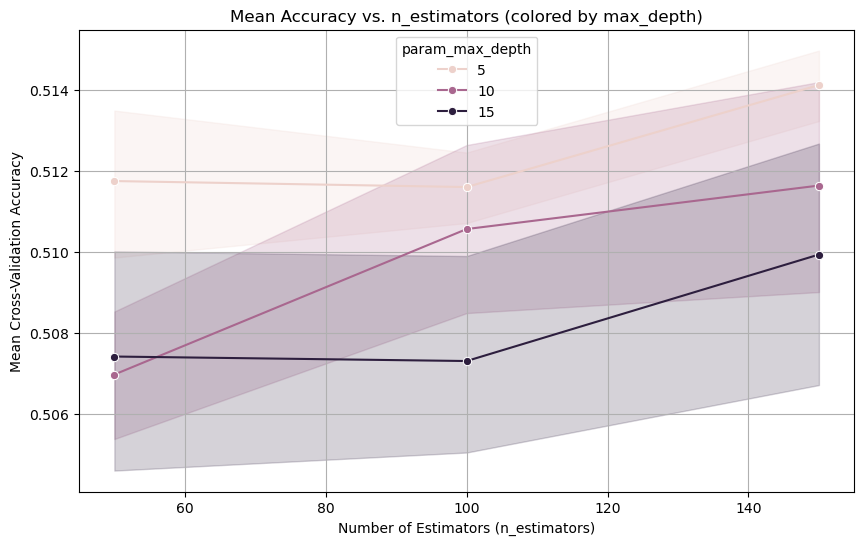

In [57]:
#Graphing of Mean Accuracy vs n_estimators
plt.figure(figsize=(10, 6))
sns.lineplot(data=result_classification_df_RFC, x="param_n_estimators", y="mean_test_score", marker="o", hue="param_max_depth")
plt.title("Mean Accuracy vs. n_estimators (colored by max_depth)")
plt.xlabel("Number of Estimators (n_estimators)")
plt.ylabel("Mean Cross-Validation Accuracy")
plt.grid(True)
plt.show()

In [58]:
#Displaying best parameters
best_params_RFC = grid_search_RFC.best_params_
best_params_RFC

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

In [59]:
#Displaying feature importance scores per feature
importances_RFC = RFC.feature_importances_
features_RFC = X_scaled.columns
importance_df_RFC = pd.DataFrame({
    'Feature': features_RFC,
    'Importance': importances_RFC
})

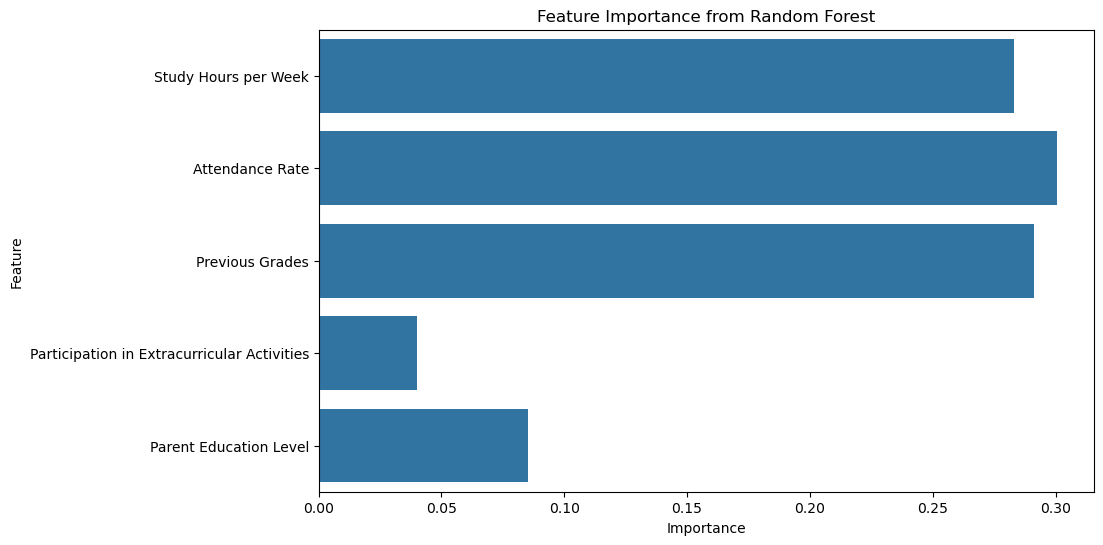

In [60]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df_RFC)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [61]:
top_n_features_RFC = importance_df_RFC.head(3)['Feature']

In [62]:
X_selected_RFC = X_scaled[top_n_features_RFC]
X_selected_RFC

,Study Hours per Week,Attendance Rate,Previous Grades
0,0.484401,0.000000,0.580909
1,-0.178502,0.994846,-0.300298
2,0.629411,0.000000,-0.092235
3,1.540903,0.066537,-0.190147
4,-0.282081,0.693772,0.440161
...,...,...,...
2995,0.049371,-1.574313,-1.352851
2996,0.235812,0.000000,-0.245223
2997,-1.317867,0.111698,-0.630751
2998,0.318675,-0.370020,0.000000


#### Cross-validation, Hyperparameter Tuning, and Feature Importance for KNN

In [64]:
#Cross-validation using 10-fold KFolds for KNN
scores_KNN = cross_val_score(KNN, X_scaled, y, cv=KF)
print("Cross-Validation Scores:", scores_KNN)

Cross-Validation Scores: [0.49       0.50666667 0.44666667 0.52333333 0.54666667 0.52
 0.47       0.51666667 0.46333333 0.48      ]


In [65]:
#Hyperparameter tuning using GridSearchCV for KNN
param_grid_KNN = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ['uniform', 'distance'],
    "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
    "leaf_size": [20, 30, 40],
    "p": [1, 2]
}
grid_search_KNN = GridSearchCV(estimator=KNN, param_grid=param_grid_KNN, cv=KF, scoring="accuracy", n_jobs=-1)
grid_search_KNN.fit(X_scaled, y)

C:\ProgramData\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 30, 40], 'n_neighbors': [3, 5, 7, 9],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [66]:
result_classification_df_KNN = pd.DataFrame(grid_search_KNN.cv_results_)

In [67]:
param_columns_KNN = [col for col in result_classification_df_KNN.columns if col.startswith("param_")]
columns_to_display_KNN = param_columns_KNN + ["mean_test_score", "std_test_score"]
result_classification_df_KNN = result_classification_df_KNN[columns_to_display_KNN].sort_values(by="mean_test_score", ascending=False)

In [68]:
print(result_classification_df_KNN.head(10).to_string(index=False)) #Displaying top 10 parameters

param_algorithm  param_leaf_size  param_n_neighbors  param_p param_weights  mean_test_score  std_test_score
           auto               40                  7        1       uniform         0.503667         0.03053
           auto               20                  7        1       uniform         0.503667         0.03053
           auto               30                  7        1       uniform         0.503667         0.03053
        kd_tree               40                  7        1       uniform         0.503667         0.03053
      ball_tree               20                  7        1       uniform         0.503667         0.03053
        kd_tree               30                  7        1       uniform         0.503667         0.03053
          brute               30                  7        1       uniform         0.503667         0.03053
        kd_tree               20                  7        1       uniform         0.503667         0.03053
          brute             

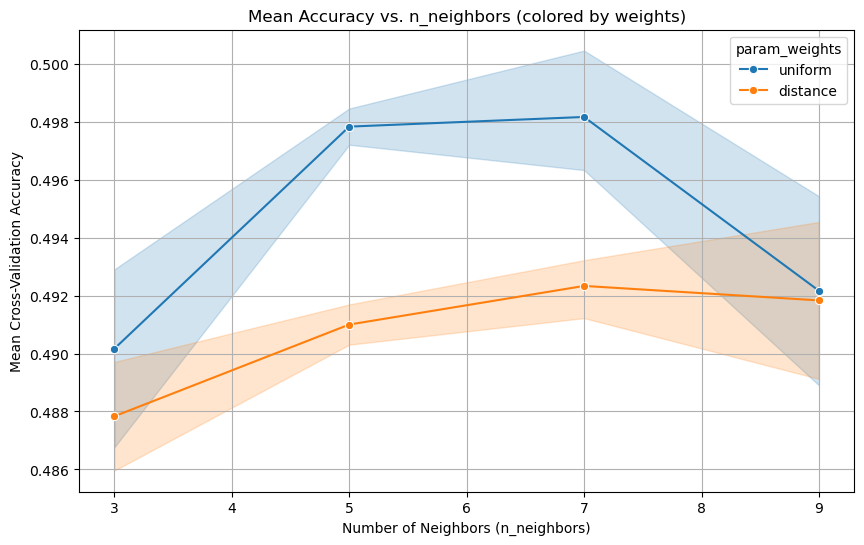

In [69]:
#Graphing of Mean Accuracy vs n_neighbors
plt.figure(figsize=(10, 6))
sns.lineplot(data=result_classification_df_KNN, x="param_n_neighbors", y="mean_test_score", marker="o", hue="param_weights")
plt.title("Mean Accuracy vs. n_neighbors (colored by weights)")
plt.xlabel("Number of Neighbors (n_neighbors)")
plt.ylabel("Mean Cross-Validation Accuracy")
plt.grid(True)
plt.show()

In [70]:
#Displaying best parameters
best_params_KNN = grid_search_KNN.best_params_
best_params_KNN

{'algorithm': 'auto',
 'leaf_size': 20,
 'n_neighbors': 7,
 'p': 1,
 'weights': 'uniform'}

In [71]:
result_KNN = permutation_importance(KNN, X_test, y_test, n_repeats=10, random_state=42) #Using permutation feature importance for KNN

In [72]:
#Displaying feature importance scores per feature
importances = result_KNN.importances_mean
features_KNN = X_scaled.columns
importance_df_KNN = pd.DataFrame({
    'Feature': features_KNN,
    'Importance': importances
})
for i, imp in enumerate(importances):
    print(f"Feature '{X_train.columns[i]}' Importance: {imp}")

Feature 'Study Hours per Week' Importance: 0.00479999999999996
Feature 'Attendance Rate' Importance: -0.0030666666666666954
Feature 'Previous Grades' Importance: 0.007733333333333292
Feature 'Participation in Extracurricular Activities' Importance: -0.0006666666666667043
Feature 'Parent Education Level' Importance: -0.026133333333333352


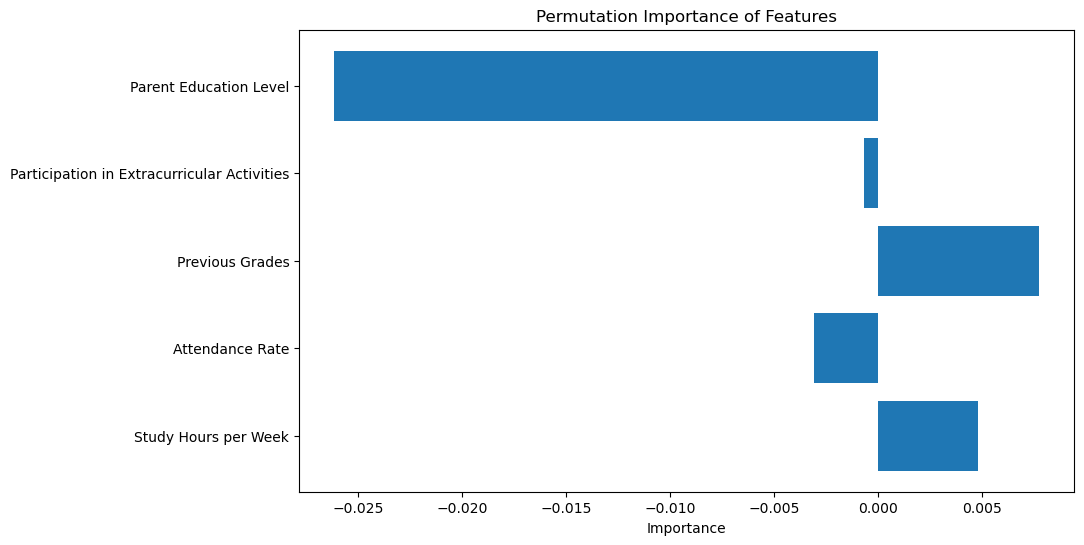

In [73]:
#Graphing feature importance for better visualization
plt.figure(figsize=(10, 6))
plt.barh(range(len(result_KNN.importances_mean)), result_KNN.importances_mean)
plt.yticks(range(len(result_KNN.importances_mean)), X_train.columns)
plt.xlabel('Importance')
plt.title('Permutation Importance of Features')
plt.show()

In [74]:
importance_df_KNN = importance_df_KNN.sort_values(by='Importance', ascending=False)

In [75]:
top_n_features_KNN = importance_df_KNN.head(3)['Feature']

In [76]:
#Feature Selection
X_selected_KNN = X_scaled[top_n_features_KNN]
X_selected_KNN

,Previous Grades,Study Hours per Week,Participation in Extracurricular Activities
0,0.580909,0.484401,1.0
1,-0.300298,-0.178502,0.0
2,-0.092235,0.629411,0.0
3,-0.190147,1.540903,1.0
4,0.440161,-0.282081,0.0
...,...,...,...
2995,-1.352851,0.049371,0.0
2996,-0.245223,0.235812,0.0
2997,-0.630751,-1.317867,1.0
2998,0.000000,0.318675,0.0


# <font color='blue'>Part-3</font>

### RANDOMFORESTCLASSIFIER

Before Hyperparameter Tuning and Feature Selection

In [80]:
RFC.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [81]:
y_pred_RFC = RFC.predict(X_test_scaled)

In [82]:
accuracy_RFC = accuracy_score(y_test, y_pred_RFC)
f1_RFC = f1_score(y_test, y_pred_RFC, average='weighted')
conf_matrix_RFC = confusion_matrix(y_test, y_pred_RFC)

In [83]:
accuracy_RFC

0.5093333333333333

In [84]:
f1_RFC

0.5053439153439153

In [85]:
conf_matrix_RFC

array([[152, 213],
       [155, 230]], dtype=int64)

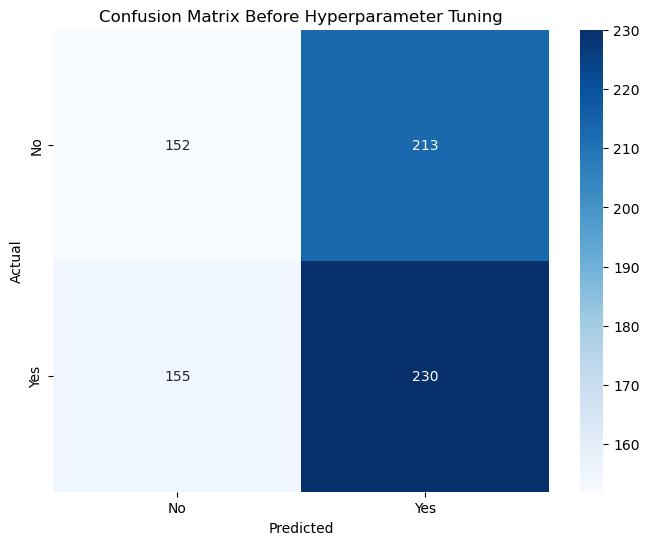

In [86]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_RFC, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix Before Hyperparameter Tuning')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

After Feature Selection

In [88]:
X_selected_train_RFC, X_selected_test_RFC, y_train, y_test = train_test_split(X_selected_RFC, y, random_state=42)

In [89]:
RFC.fit(X_selected_train_RFC, y_train)

RandomForestClassifier(random_state=42)

In [90]:
y_selected_pred_RFC = RFC.predict(X_selected_test_RFC)

In [95]:
accuracy_selected_RFC = accuracy_score(y_test, y_selected_pred_RFC)
f1_selected_RFC = f1_score(y_test, y_selected_pred_RFC, average='weighted')
conf_matrix_selected_RFC = confusion_matrix(y_test, y_selected_pred_RFC)

In [97]:
accuracy_selected_RFC

0.528

In [99]:
f1_selected_RFC

0.5248291454040437

In [101]:
conf_matrix_selected_RFC

array([[162, 203],
       [151, 234]], dtype=int64)

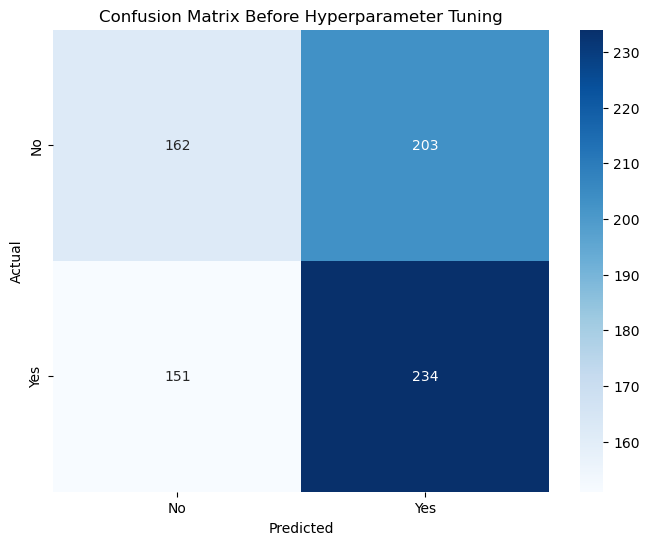

In [103]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_selected_RFC, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix Before Hyperparameter Tuning')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

After Hyperparameter Tuning

In [118]:
RFC_tuned = RandomForestClassifier(
    n_estimators=best_params_RFC['n_estimators'],
    max_depth=best_params_RFC['max_depth'],
    min_samples_split=best_params_RFC['min_samples_split'],
    min_samples_leaf=best_params_RFC['min_samples_leaf'],
    random_state=42)

In [120]:
RFC_tuned.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, n_estimators=150, random_state=42)

In [122]:
y_pred_tuned_RFC = RFC_tuned.predict(X_test_scaled)

In [124]:
accuracy_tuned_RFC = accuracy_score(y_test, y_pred_tuned_RFC)
f1_tuned_RFC = f1_score(y_test, y_pred_tuned_RFC, average='weighted')
conf_matrix_tuned_RFC = confusion_matrix(y_test, y_pred_tuned_RFC)

In [126]:
accuracy_tuned_RFC

0.5173333333333333

In [128]:
f1_tuned_RFC

0.4960514609051961

In [130]:
conf_matrix_tuned_RFC

array([[112, 253],
       [109, 276]], dtype=int64)

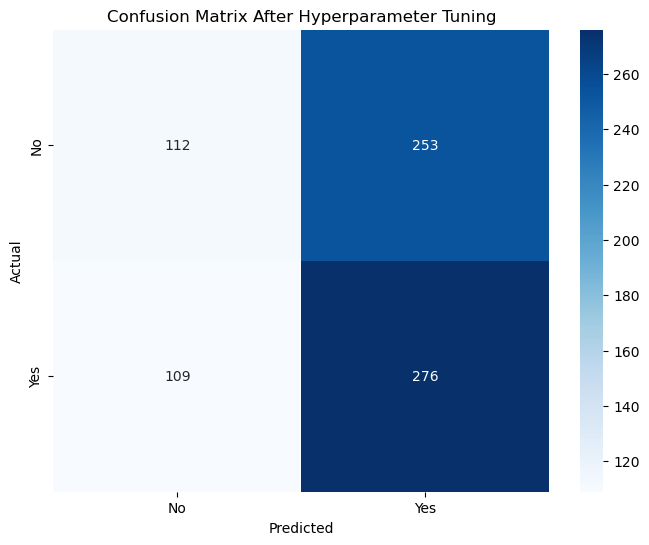

In [132]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tuned_RFC, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix After Hyperparameter Tuning')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

After Hyperparameter Tuning and Feature Selection

In [135]:
RFC_tuned.fit(X_selected_train_RFC, y_train)

RandomForestClassifier(max_depth=10, n_estimators=150, random_state=42)

In [137]:
y_pred_selected_tuned_RFC = RFC_tuned.predict(X_selected_test_RFC)

In [139]:
accuracy_selected_tuned_RFC = accuracy_score(y_test, y_pred_selected_tuned_RFC)
f1_selected_tuned_RFC = f1_score(y_test, y_pred_selected_tuned_RFC, average='weighted')
conf_matrix_selected_tuned_RFC = confusion_matrix(y_test, y_pred_selected_tuned_RFC)

In [141]:
accuracy_selected_tuned_RFC

0.532

In [143]:
f1_selected_tuned_RFC

0.49864870101344544

In [145]:
conf_matrix_selected_tuned_RFC

array([[ 98, 267],
       [ 84, 301]], dtype=int64)

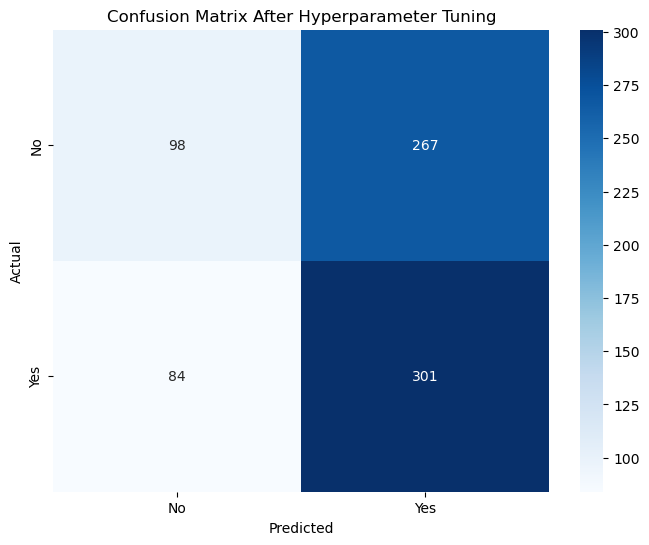

In [147]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_selected_tuned_RFC, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix After Hyperparameter Tuning')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [149]:
train_score_new_RFC = RFC.score(X_selected_train_RFC, y_train)
test_score_new_RFC = RFC.score(X_selected_test_RFC, y_test)

In [151]:
print(f"Training Score: {train_score_new_RFC:.2f}")
print(f"Testing Score: {test_score_new_RFC:.2f}")

Training Score: 1.00
Testing Score: 0.53


### KNN

Before Hyperparameter Tuning and Feature Selection

In [155]:
KNN.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [157]:
y_pred_KNN = KNN.predict(X_test_scaled)

In [158]:
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
f1_KNN = f1_score(y_test, y_pred_KNN, average='weighted')
conf_matrix_KNN = confusion_matrix(y_test, y_pred_KNN)

In [161]:
accuracy_KNN

0.5173333333333333

In [163]:
f1_KNN

0.5147078890035547

In [165]:
conf_matrix_KNN

array([[161, 204],
       [158, 227]], dtype=int64)

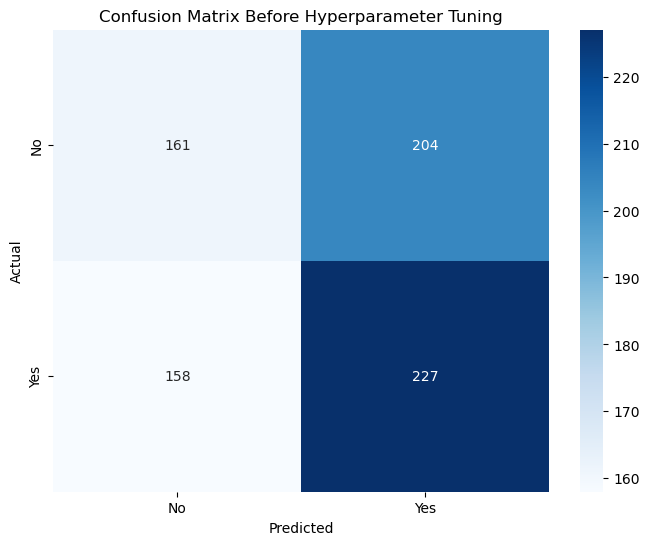

In [167]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_KNN, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix Before Hyperparameter Tuning')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

After Feature Selection

In [170]:
X_selected_train_KNN, X_selected_test_KNN, y_train, y_test = train_test_split(X_selected_KNN, y, random_state=42)

In [172]:
KNN.fit(X_selected_train_KNN, y_train)

KNeighborsClassifier()

In [174]:
y_selected_pred_KNN = KNN.predict(X_selected_test_KNN)

In [176]:
accuracy_selected_KNN = accuracy_score(y_test, y_selected_pred_KNN)
f1_selected_KNN = f1_score(y_test, y_selected_pred_KNN, average='weighted')
conf_matrix_selected_KNN = confusion_matrix(y_test, y_selected_pred_KNN)

In [178]:
accuracy_selected_KNN

0.484

In [180]:
f1_selected_KNN

0.480648298798656

In [182]:
conf_matrix_selected_KNN

array([[146, 219],
       [168, 217]], dtype=int64)

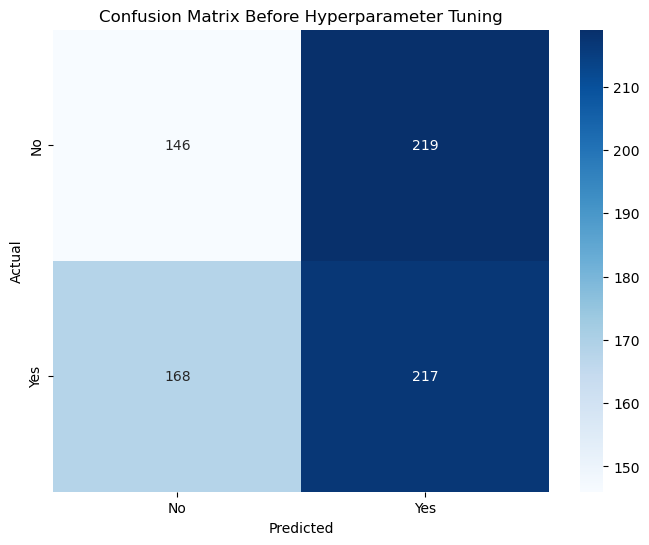

In [184]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_selected_KNN, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix Before Hyperparameter Tuning')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

After Hyperparameter Tuning

In [187]:
KNN_tuned = KNeighborsClassifier(
    n_neighbors=best_params_KNN['n_neighbors'],
    weights=best_params_KNN['weights'],
    algorithm=best_params_KNN['algorithm'],
    leaf_size=best_params_KNN['leaf_size'],
    p=best_params_KNN['p'])

In [189]:
KNN_tuned.fit(X_train_scaled, y_train)

KNeighborsClassifier(leaf_size=20, n_neighbors=7, p=1)

In [191]:
y_pred_tuned_KNN = KNN_tuned.predict(X_test_scaled)

In [193]:
accuracy_tuned_KNN = accuracy_score(y_test, y_pred_tuned_KNN)
f1_tuned_KNN= f1_score(y_test, y_pred_tuned_KNN, average='weighted')
conf_matrix_tuned_KNN = confusion_matrix(y_test, y_pred_tuned_KNN)

In [195]:
accuracy_tuned_KNN

0.492

In [197]:
f1_tuned_KNN

0.4874850658075796

In [199]:
conf_matrix_tuned_KNN

array([[144, 221],
       [160, 225]], dtype=int64)

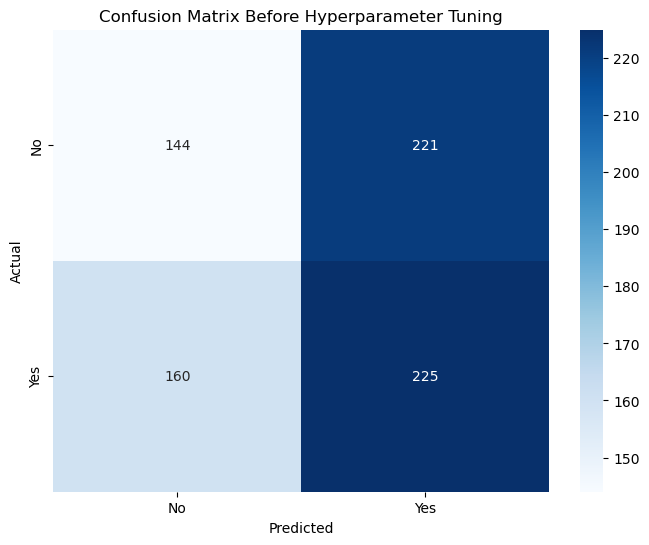

In [201]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tuned_KNN, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix Before Hyperparameter Tuning')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

After Hyperparameter Tuning and Feature Selection

In [204]:
KNN_tuned.fit(X_selected_train_KNN, y_train)

KNeighborsClassifier(leaf_size=20, n_neighbors=7, p=1)

In [206]:
y_pred_selected_tuned_KNN = KNN_tuned.predict(X_selected_test_KNN)

In [208]:
accuracy_selected_tuned_KNN = accuracy_score(y_test, y_pred_selected_tuned_KNN)
f1_selected_tuned_KNN = f1_score(y_test, y_pred_selected_tuned_KNN, average='weighted')
conf_matrix_selected_tuned_KNN = confusion_matrix(y_test, y_pred_selected_tuned_KNN)

In [210]:
accuracy_selected_tuned_KNN

0.4866666666666667

In [212]:
f1_selected_tuned_KNN

0.48236534899510236

In [214]:
conf_matrix_selected_tuned_KNN

array([[143, 222],
       [163, 222]], dtype=int64)

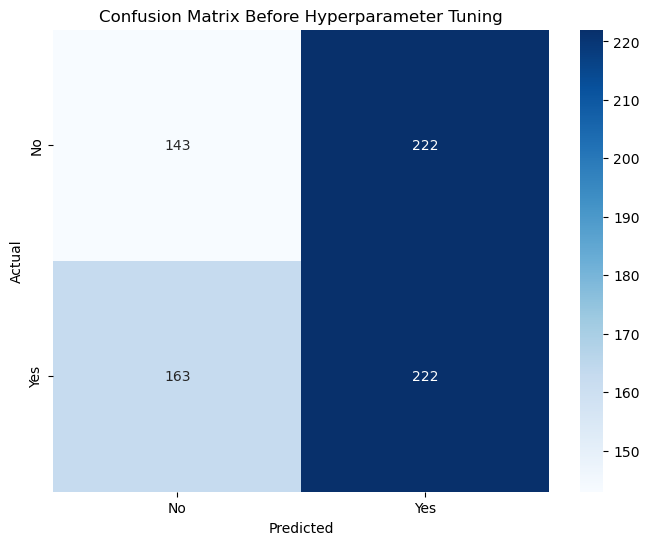

In [216]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_selected_tuned_KNN, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix Before Hyperparameter Tuning')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [218]:
train_score_new_KNN = KNN.score(X_selected_train_KNN, y_train)
test_score_new_KNN = KNN.score(X_selected_test_KNN, y_test)

In [220]:
print(f"Training Score: {train_score_new_KNN:.2f}")
print(f"Testing Score: {test_score_new_KNN:.2f}")

Training Score: 0.69
Testing Score: 0.48


# <font color='blue'>Part-4</font>

<p>
    


For our classification task, we utilized the **RandomForestClassifier** and **KNN** models. We performed cross-validation, hyperparameter tuning, and feature importance analysis for both models. Starting with the RandomForestClassifier, the cross-validation scores ranged from 0.47 to 0.54, with an average score suggesting moderate performance. Hyperparameter tuning was conducted using GridSearchCV, testing combinations of `max_depth` ([5, 10, 15]), `min_samples_leaf` ([1, 2, 4]), `min_samples_split` ([2, 5, 10]), and `n_estimators` ([50, 100, 150]). The mean cross-validation accuracy was highest for a `max_depth` of 5, followed by 10 and 15. Feature importance analysis revealed that **Attendance Rate** was the most significant feature, followed by **Previous Grades** and **Study Hours per Week**, indicating that these factors heavily influenced model predictions.

For KNN, cross-validation scores varied between 0.4467 and 0.5467, with performance slightly lower than RandomForest on average. Hyperparameter tuning explored different values for `algorithm` (`auto`, `ball_tree`, `kd_tree`, `brute`), `leaf_size` ([20, 30, 40]), `n_neighbors` ([3, 5, 7, 9]), `p` ([1, 2]), and `weights` (`uniform`, `distance`). The best parameters identified were `algorithm=auto`, `leaf_size=20`, `n_neighbors=7`, `p=1`, and `weights=uniform`, achieving a mean cross-validation accuracy of 0.499. Feature importance analysis highlighted that **Study Hours per Week** and **Previous Grades** were the most relevant features for KNN, though their influence was relatively weak compared to RandomForest. Feature scaling was applied to further refine feature selection, but its impact varied across models.

When comparing before and after hyperparameter tuning and feature scaling, the RandomForestClassifier showed incremental improvements. Before tuning and feature scaling, its accuracy was 0.5093, improving to 0.528 after scaling and reaching 0.532 with both tuning and scaling. The confusion matrix showed the model performed moderately well in predicting "Yes" cases, though it struggled with "No" predictions, leading to notable false positives. Feature scaling reduced false negatives, enhancing overall accuracy and indicating the importance of refining the feature set for optimal performance.

In contrast, KNN demonstrated less consistency. Before tuning and feature scaling, the accuracy was 0.5173, which decreased slightly to 0.484 after scaling and 0.4867 after tuning and scaling. The confusion matrix revealed that KNN struggled with false positives and negatives, and feature scaling did not significantly improve its ability to distinguish between classes. Training and test scores further emphasized the disparity, with KNN achieving a training score of 0.69 and a test score of 0.48, compared to RandomForest's training score of 1.00 and test score of 0.53, indicating that RandomForest generalized better to unseen data.
  
From this analysis, RandomForestClassifier outperformed KNN in terms of both accuracy and interpretability. RandomForest's feature importance revealed critical predictors such as Attendance Rate and Previous Grades, which can inform strategies for improving outcomes. The moderate success of KNN suggests it may not be the best choice for this dataset without further refinement, particularly in terms of feature engineering or alternative distance metrics. Overall, incorporating hyperparameter tuning and feature scaling proved valuable for RandomForest, while its impact on KNN was limited. Future work could explore ensemble methods or hybrid models to further improve performance.



</p>